In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [119]:
X1 = np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], 500)
X2 = np.random.multivariate_normal([1, 1], [[2, 1], [1, 2]], 500)

In [120]:
X = np.vstack((X1, X2))

In [150]:
y = [1 for i in range(500)]
for i in range(500, 1000):
    y.append(0)
y = np.array(y)

In [151]:
w1 = np.random.random((2, 3))
w2 = np.random.random((3, 5))
w3 = np.random.random((5, 3))
global w4

In [152]:
w4 = np.random.random((3, 1))

In [153]:
def MSE(y_true, y_predicted):
    l = ((y_true - y_predicted) ** 2)
#     print(l)
    return np.sum(l) / l.shape[1]

In [154]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [329]:
def forward(X):
    H1 = np.dot(w1.T, X.T)
    H1_out = sigmoid(H1)
    
    H2 = np.dot(w2.T, H1_out)
    H2_out = sigmoid(H2)
    
    H3 = np.dot(w3.T, H2_out)
    H3_out = sigmoid(H3)
    
    H4 = np.dot(w4.T, H3_out)
    y = sigmoid(H4)
    return y

In [331]:
def MSE_backprop(X, w1, w2, w3, w4, learning_rate=0.0001, ):
    H1 = np.dot(w1.T, X.T)
    H1_out = sigmoid(H1)
    
    H2 = np.dot(w2.T, H1_out)
    H2_out = sigmoid(H2)
    
    H3 = np.dot(w3.T, H2_out)
    H3_out = sigmoid(H3)
    
    H4 = np.dot(w4.T, H3_out)
    y_out = sigmoid(H4)
    
    E_wrt_w4 = np.zeros((3, ))
    for i in range(1000):
        delta3i = y_out[:, i][0] - y[i]
        part2 = sigmoid(y_out[:, i][0])
        part2 = part2 * (1 - part2)
        part3 = H3_out[:, i]
        E_wrt_w4 += delta3i * part2 * part3
    E_wrt_w4 = np.expand_dims(E_wrt_w4, axis=1)
    
    E_wrt_w3 = np.zeros((5, 3))
    
    for i in range(1000):
        part1 = y_out[:, i][0] - y[i]
        part2 = sigmoid(y_out[:, i][0])
        part2 = part2 * (1 - part2)
        
        delta3i = w4 * part1 * part2
        delta3i = np.squeeze(delta3i)
        part3 = sigmoid(H3[:, i]) * (1 - sigmoid(H3[:, i]))
        mid = np.multiply(delta3i, part3)
        mid = np.expand_dims(mid, axis=1)
        val = np.dot(mid, np.expand_dims(H2_out[:, i], axis=1).T)
        E_wrt_w3 += val.T

    E_wrt_w2 = np.zeros((3, 5))
    for i in range(1000):
        part1 = y_out[:, i][0] - y[i]
        part2 = sigmoid(y_out[:, i][0])
        part2 = part2 * (1 - part2)
        
        delta3i = part1 * part2
        c = sigmoid(H3[:, i]) * (1 - sigmoid(H3[:, i]))
        c = np.expand_dims(c, axis=1)
        delta2i = np.multiply(w4 * delta3i, c)
        
        part3 = np.dot(w3, delta2i)
        d = sigmoid(H2[:, i]) * (1 - sigmoid(H2[:, i]))
        d = np.expand_dims(d, axis=1)
        e = np.multiply(part3, d)
        
        val = np.dot(e, np.expand_dims(H1_out[:, i], axis=1).T)
        E_wrt_w2 += val.T
        
    E_wrt_w1 = np.zeros((2, 3))
    for i in range(1000):
        part1 = y_out[:, i][0] - y[i]
        part2 = sigmoid(y_out[:, i][0])
        part2 = part2 * (1 - part2)
        
        delta3i = part1 * part2
        c = sigmoid(H3[:, i]) * (1 - sigmoid(H3[:, i]))
        c = np.expand_dims(c, axis=1)
        delta2i = np.multiply(w4 * delta3i, c)
        
        p1 = np.dot(w3, delta2i)
        d = sigmoid(H2[:, i]) * (1 - sigmoid(H2[:, i]))
        d = np.expand_dims(d, axis=1)
        delta1i = np.multiply(p1, d)
        
        p2 = np.dot(w2, delta1i)
        e = sigmoid(H1[:, i]) * (1 - sigmoid(H1[:, i]))
        e = np.expand_dims(e, axis=1)
        
        delta = np.multiply(p2, e)
        val = np.dot(delta, np.expand_dims(X[i], axis=1).T)
        E_wrt_w1 += val.T
    w4 = w4 - learning_rate * E_wrt_w4
    w3 = w3 - learning_rate * E_wrt_w3
    w2 = w2 - learning_rate * E_wrt_w2
    w1 = w1 - learning_rate * E_wrt_w1
    
    return w1, w2, w3, w4

In [348]:
loss = []
for i in range(500):
    w1, w2, w3, w4 = MSE_backprop(X, w1, w2, w3, w4)
    y_pred = forward(X)
    loss.append(MSE(y, y_pred))

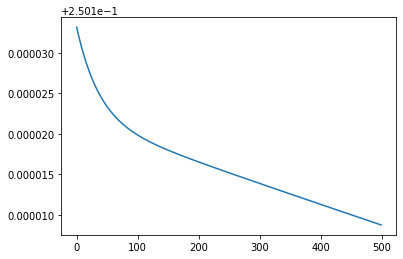

In [350]:

plt.plot(range(500), loss)